In [101]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Get Listings_df

In [102]:
listings_df = pd.read_csv('listings.csv')

In [103]:
#get rid of price dollar signs for price
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [104]:
total_listings = listings_df.shape[0]

In [156]:
#Creating dfs for each metropolitan

#Asheville
Ash_listings_df = listings_df[listings_df['metropolitan']=='asheville']
#Austin
Aust_listings_df = listings_df[listings_df['metropolitan']=='austin']
#Nashville
Nash_listings_df = listings_df[listings_df['metropolitan']=='nashville']
#New Orleans
Orl_listings_df = listings_df[listings_df['metropolitan']=='new_orleans']
#LA
LA_listings_df = listings_df[listings_df['metropolitan']=='LA']

metropolitans = ['Asheville', 'Austin', 'Nashville', 'New Orleans', 'LA']
dfs_by_metropolitan = [Ash_listings_df, Aust_listings_df, Nash_listings_df, Orl_listings_df, LA_listings_df]

# Make extra column of number listings under the id and multiple listing?

In [6]:
dfs = [Ash_listings_df, Aust_listings_df, Nash_listings_df, Orl_listings_df, LA_listings_df] #list of ackronyms

In [111]:
#Adding a column to the listings_df that notes how many properties the host owns

#create a dictionary of ids
id_grouping = listings_df.groupby('host_id').count().sort_values('accommodates', ascending = False).iloc[:,:1]
id_grouping.reset_index(level = 0, inplace =True)
id_dict = dict(zip(id_grouping.host_id,id_grouping.accommodates))

#map dictionary to new dataframe column
listings_df['No_properties_under_id'] = listings_df['host_id'].map(id_dict)

In [112]:
#Add a column where = 0 for host owns 1 property, =1 if host owns more than 1
listings_df.loc[listings_df['No_properties_under_id']==1, 'multiple_listing'] = 0
listings_df.loc[listings_df['No_properties_under_id']>1, 'multiple_listing'] = 1

In [155]:
#Add a column where = 0 for host owns 1 property, =1 if host owns more than 1
#listings_df.drop(['Listing Type'], axis = 1, inplace = True)
listings_df.loc[listings_df['No_properties_under_id']==1, 'Listing Type'] = 'single'
listings_df.loc[(listings_df['No_properties_under_id']>1)&
                (listings_df['No_properties_under_id']<6), 'Listing Type'] = '2-5 listings'
listings_df.loc[(listings_df['No_properties_under_id']>5)&
                (listings_df['No_properties_under_id']<11), 'Listing Type'] = '6-10 listings'
listings_df.loc[(listings_df['No_properties_under_id']>10), 'Listing Type'] = '11+ listings'

Rerun dfs for each metropolitan cell after these^^

# Make a bar chart of percentages of listings compared to no under id

In [13]:
def multiple_percent(listings_df, metro):
    metro = str(metro)
    multiple_total_df = listings_df.groupby('No_properties_under_id').count().iloc[:,:1]
    multiple_total_df.reset_index(inplace = True, drop = False)
    multiple_total_df = multiple_total_df.rename(columns={'accommodates':'Total_listings'})
    multiple_total_df.loc[multiple_total_df['No_properties_under_id'] >= 11, 'No_properties_under_id'] = 11
    multiple_total_df.loc[(multiple_total_df['No_properties_under_id'] <=10) &
                          (multiple_total_df['No_properties_under_id'] >=6), 'No_properties_under_id'] = 6
    multiple_total_df.loc[(multiple_total_df['No_properties_under_id'] <=5) &
                          (multiple_total_df['No_properties_under_id'] >=2), 'No_properties_under_id'] = 2
    multiple_total_df = multiple_total_df.groupby('No_properties_under_id').sum()
    multiple_total_df = (100. * multiple_total_df / multiple_total_df.sum()).round(1)
    multiple_total_df = multiple_total_df.rename(columns={'Total_listings': f'{metro}'}, index={1:'1', 2:'2-5', 6:'6-10', 11:'11+'})
    return multiple_total_df

In [14]:
multiple_per_ls = [multiple_percent(listings_df, 'Total South')]
for i in range(0,5):
    multiple_per_ls.append(multiple_percent(dfs_by_metropolitan[i], metropolitans[i]))
percent_df = pd.concat(multiple_per_ls, axis=1)
new_columns = {''}
percent_df

,Total South,Asheville,Austin,Nashville,New Orleans,LA
No_properties_under_id,,,,,,
1,55.2,60.0,66.5,56.3,48.3,52.6
2-5,30.6,31.9,24.2,29.9,35.5,31.8
6-10,6.8,5.6,3.0,4.5,7.3,8.2
11+,7.4,2.5,6.3,9.3,8.9,7.4


Text(0.5, 0, '% of listings')

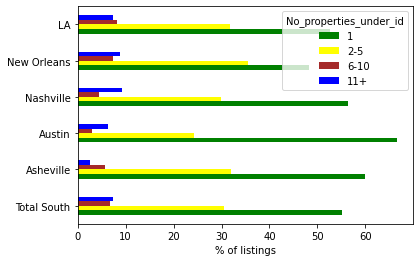

In [15]:
alt_df = percent_df.transpose()
ax = alt_df.plot.barh(color = ['green','yellow','brown', 'blue'])
ax.set_xlabel('% of listings')

<AxesSubplot:>

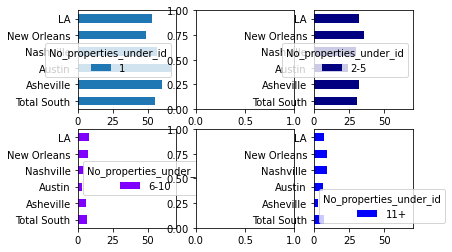

In [16]:
#can make it look better
fig, axes = plt.subplots(nrows=2, ncols=3)

alt_df.iloc[:,:1].plot.barh(ax=axes[0,0], xlim = (0,70))
alt_df.iloc[:,1:2].plot.barh(ax=axes[0,2], colormap = 'jet', xlim = (0,70))
alt_df.iloc[:,2:3].plot.barh(ax=axes[1,0], colormap = 'rainbow', xlim = (0,70))
alt_df.iloc[:,3:4].plot.barh(ax=axes[1,2], colormap = 'brg', xlim = (0,70))

# Compare multiple id listings to single for various attributes

Price/accomodates (price for one person) vs multiple listings

In [149]:
#add a column to listings with price/accomodates

#check for nans in listings_df
#listings_df.isnull().sum()

#create price/accomodates column:
listings_df['price/accomm'] = listings_df['price']/listings_df['accommodates']
listings_df

#rerun metros df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,occupancy_rate,price/accomm,No_properties_under_id,multiple_listing,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,10.0,Entire home/apt,NC,$650.00,28806.0,0.848635,52.50,1,0.0,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,9.0,Entire home/apt,NC,NaN,28806.0,0.627516,31.25,4,1.0,2-5 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NaN,Private room,NC,NaN,28806.0,0.991453,45.00,1,0.0,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,Shared room,NC,NaN,28806.0,0.977943,4.00,6,1.0,6-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,10.0,Shared room,NC,NaN,28806.0,0.957844,4.00,6,1.0,6-10 listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,NaN,Private room,CA,NaN,90631,0.997347,37.50,1,0.0,single
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,NaN,Private room,CA,NaN,90265,0.453923,102.50,2,1.0,2-5 listings
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,NaN,Entire home/apt,CA,NaN,90265,0.997347,50.00,1,0.0,single
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,NaN,Private room,CA,NaN,90631,0.431017,16.25,1,0.0,single


In [20]:
#Make price/accomm lists

#Asheville
price_Ash = Ash_listings_df[['price/accomm']]
#Austin
price_Aust = Aust_listings_df[['price/accomm']]
#Nasheville
price_Nash = Nash_listings_df[['price/accomm']]
#New Orleans
price_Orl = Orl_listings_df[['price/accomm']]
#LA
price_LA = LA_listings_df[['price/accomm']]

price_list_by_met = [price_Ash, price_Aust, price_Nash, price_Orl, price_LA]
metropolitans = ['Asheville', 'Austin', 'Nashville', 'New Orleans', 'LA']
price_list_by_met[0].max()

price/accomm    147.5
dtype: float64

In [21]:
#find percentiles of price/accomm
price_dist_by_met = [] #list with price distributions by metropolitan

#for loop to get stats and append to each list
for x in price_list_by_met:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_dist_by_met.append(i)

#rename names of prices columns
for j in range(0,5):
    price_dist_by_met[j].rename(columns={'price/accomm':metropolitans[j]}, inplace = True)

#finalise statsdf
price_stats_df = price_dist_by_met
price_stats_df=[df.set_index('Stats') for df in price_stats_df]
#price_stats_df=price_stats_df[0].join(price_stats_df[1:])
#price_stats_df[0]

#for i in range(0,5):
   # price_stats_df[i].rename(columns={'price/accomm'}
pd.concat(price_stats_df, axis=1)

,Asheville,Austin,Nashville,New Orleans,LA
Stats,,,,,
min,4.0,0.0,0.937500,0.0,1.200000
25%,25.0,29.5,24.750000,25.0,27.958333
50%,33.5,45.0,33.333333,37.5,39.666667
75%,45.0,75.0,48.333333,52.5,56.250000
max,147.5,5000.0,750.000000,9999.0,10000.000000


<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

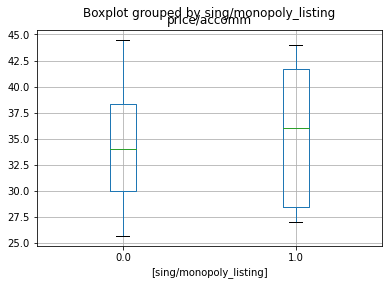

In [184]:
Ash_listings_df[(Ash_listings_df['price/accomm']<45.0)&
               (Ash_listings_df['price/accomm']>25.0)].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

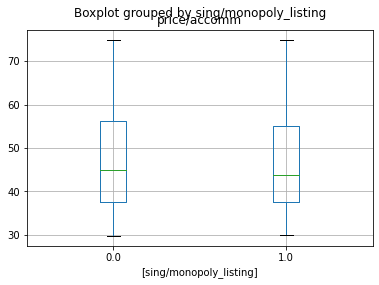

In [185]:
Aust_listings_df[(Aust_listings_df['price/accomm']<75.0)&
                (Aust_listings_df['price/accomm']>29.5)].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

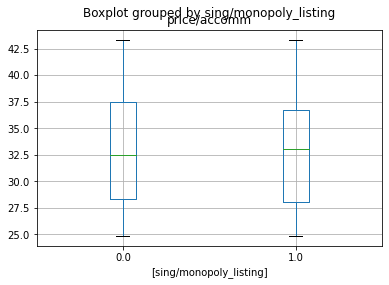

In [186]:
Nash_listings_df[(Nash_listings_df['price/accomm']<43.4)&
                (Nash_listings_df['price/accomm']>24.75)].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

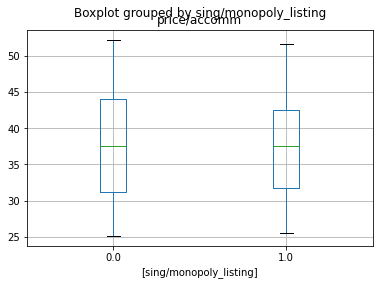

In [187]:
Orl_listings_df[(Orl_listings_df['price/accomm']<52.5)&
               (Orl_listings_df['price/accomm']>25.0)].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

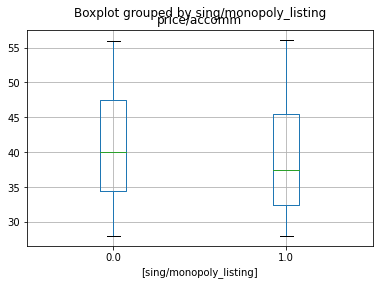

In [188]:
LA_listings_df[(LA_listings_df['price/accomm']>27.95) &
              (LA_listings_df['price/accomm']<56.25)].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

In [156]:
listings_df['price'].quantile([0.25,0.75])

0.25     75.0
0.75    200.0
Name: price, dtype: float64

<AxesSubplot:title={'center':'price/accomm'}, xlabel='[sing/monopoly_listing]'>

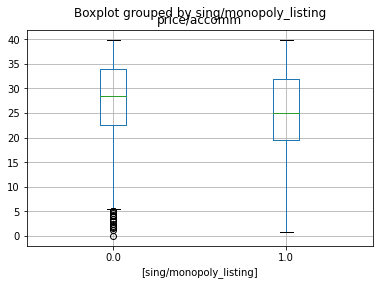

In [190]:
listings_df[listings_df['price/accomm']<40].boxplot(column=['price/accomm'], by=['sing/monopoly_listing'])

## Occupancy vs multiple listings

In [106]:
listing_cal_df = pd.read_csv('listings_join_cal.csv')
listing_cal_df.rename(columns={'occupancy rate':'occupancy_rate'}, inplace =True)
list(listing_cal_df)

['listing_id',
 'occupancy_rate',
 'price',
 'latitude',
 'longitude',
 'neighbourhood',
 'metropolitan']

In [107]:
#make dict of listing_id to occupancy rate
id_dict = dict(zip(listing_cal_df.listing_id,listing_cal_df.occupancy_rate))
listings_df['occupancy_rate'] = listings_df['id'].map(id_dict)

In [115]:
listings_df.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,occupancy_rate,price/accomm,No_properties_under_id,multiple_listing,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,10.0,Entire home/apt,NC,$650.00,28806.0,0.848635,52.50,1,0.0,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,9.0,Entire home/apt,NC,NaN,28806.0,0.627516,31.25,4,1.0,2-5 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NaN,Private room,NC,NaN,28806.0,0.991453,45.00,1,0.0,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,Shared room,NC,NaN,28806.0,0.977943,4.00,6,1.0,6-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,10.0,Shared room,NC,NaN,28806.0,0.957844,4.00,6,1.0,6-10 listings


<AxesSubplot:ylabel='Frequency'>

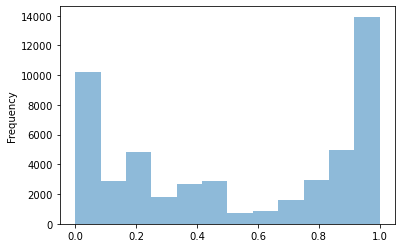

In [89]:
listings_df['occupancy_rate'].plot.hist(by = 'multiple_listing', bins=12, alpha=0.5)

In [144]:
listing_type = ['single','2-5 listings', '6-10 listings', '11+ listings']
occupancys = {}
just_houses = listings_df[(listings_df['property_type']=='House')|
                         (listings_df['property_type']=='Apartment')|
                         (listings_df['property_type']=='Condominium')]
for typ in listing_type:
     occupancys[typ]=just_houses[just_houses['Listing Type']== typ]['occupancy_rate']
# occ = pd.DataFrame(occupancys, listing_type).transpose()
# occ.plot.hist(bins=12, alpha=0.5)

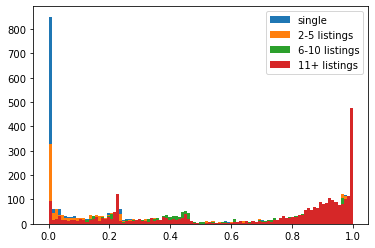

In [145]:
from matplotlib import pyplot

bins = np.linspace(0, 1, 100)

for typ in listing_type:
    pyplot.hist(occupancys[typ][:3400],bins, label = typ, alpha = 1)

pyplot.legend(loc='upper right')
pyplot.show()

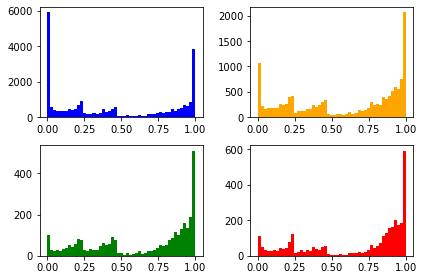

In [147]:
f,a = plt.subplots(2,2)
a = a.ravel()
bins = np.linspace(0, 1, 50)
colours = ['blue', 'orange', 'green', 'red']
for idx,ax in enumerate(a):
    ax.hist(occupancys[listing_type[idx]], bins, color = colours[idx])
    #ax.set_title(titles[idx])
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])

plt.tight_layout()

In [146]:
just_houses['property_type'].unique()

array(['House', 'Apartment', 'Condominium'], dtype=object)

In [143]:
list(listings_df

['accommodates',
 'amenities',
 'availability_30',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'has_availability',
 'host_id',
 'id',
 'instant_bookable',
 'latitude',
 'longitude',
 'metropolitan',
 'name',
 'price',
 'property_type',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'room_type',
 'state',
 'weekly_price',
 'zipcode',
 'occupancy_rate',
 'price/accomm',
 'No_properties_under_id',
 'multiple_listing',
 'Listing Type']

In [127]:
occupancys

{'single': 0        0.848635
 2        0.991453
 6        0.892694
 7        0.894045
 8        0.292225
            ...   
 50315    0.082913
 50316    0.997347
 50318    0.997347
 50319    0.431017
 50320    0.984085
 Name: occupancy_rate, Length: 27760, dtype: float64,
 '2-5 listings': 1        0.627516
 5        0.905680
 15       0.887076
 16       0.909098
 17       0.800000
            ...   
 50305    0.189826
 50306    0.861456
 50307    0.867577
 50312    0.044408
 50317    0.453923
 Name: occupancy_rate, Length: 15408, dtype: float64,
 '6-10 listings': 3        0.977943
 4        0.957844
 19       0.503722
 28       0.432506
 65       0.990526
            ...   
 50261    0.826890
 50274    0.900000
 50296    0.923077
 50302    1.000000
 50309    0.769231
 Name: occupancy_rate, Length: 3431, dtype: float64,
 '11+ listings': 341      0.911497
 360      0.818693
 362      0.846857
 363      0.877998
 364      0.823739
            ...   
 50172    0.934394
 50203    0.947891
 

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[multiple_listing]'>

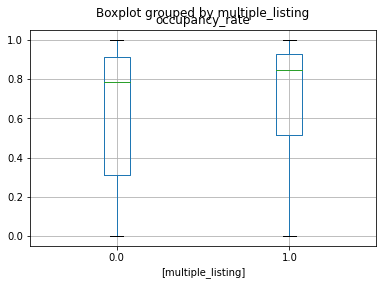

In [215]:
#boxplots for occupancy rate vs multiple single
Ash_listings_df[(Ash_listings_df['price/accomm']<45.0)&
               (Ash_listings_df['price/accomm']>25.0)].boxplot(column=['occupancy_rate'], by=['multiple_listing'])

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[multiple_listing]'>

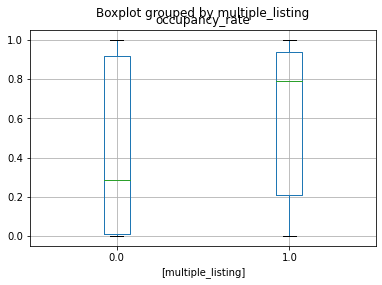

In [214]:
Aust_listings_df[(Aust_listings_df['price/accomm']<75.0)&
                (Aust_listings_df['price/accomm']>29.5)].boxplot(column=['occupancy_rate'], by=['multiple_listing'])

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[multiple_listing]'>

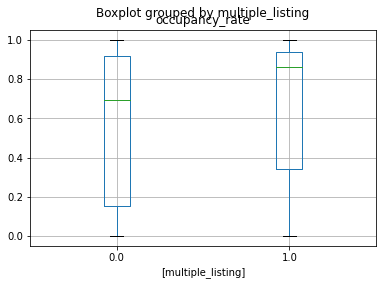

In [220]:
Nash_listings_df[(Nash_listings_df['price/accomm']<43.4)&
                (Nash_listings_df['price/accomm']>24.75)].boxplot(column=['occupancy_rate'], by=['multiple_listing'])

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[sing/monopoly_listing]'>

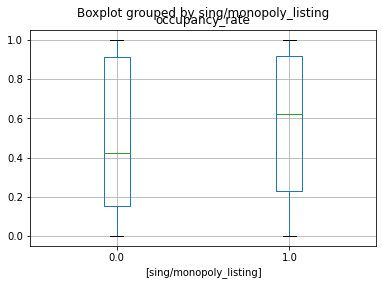

In [221]:
Orl_listings_df[(Orl_listings_df['price/accomm']<52.5)&
               (Orl_listings_df['price/accomm']>25.0)].boxplot(column=['occupancy_rate'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[sing/monopoly_listing]'>

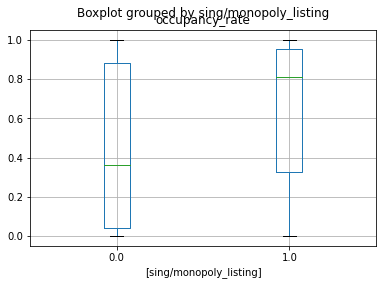

In [222]:
LA_listings_df[(LA_listings_df['price/accomm']>27.95) &
              (LA_listings_df['price/accomm']<56.25)].boxplot(column=['occupancy_rate'], by=['sing/monopoly_listing'])

<AxesSubplot:title={'center':'occupancy_rate'}, xlabel='[sing/monopoly_listing]'>

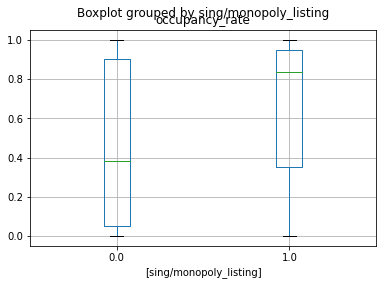

In [224]:
listings_df[(listings_df['price/accomm']<100)&
            (listings_df['price/accomm']>10)].boxplot(column=['occupancy_rate'], by=['sing/monopoly_listing'])

# Test whether occupancy is different for each group

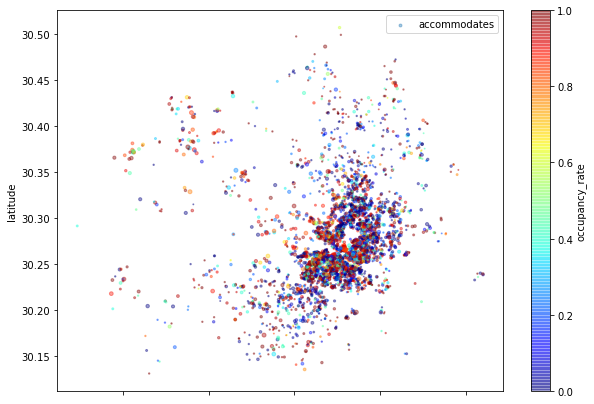

In [225]:
#maps of occupancy rate
#make a heat map of prices for Austin

#get rid of outliers over 75th percentile
Afford_Aust = Aust_listings_df[(Aust_listings_df['price/accomm']<75.0)&
                               (Aust_listings_df['price/accomm']>29.5)]

Afford_Aust.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=Afford_Aust['accommodates'], label='accommodates', figsize=(10,7),
                    c='occupancy_rate', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

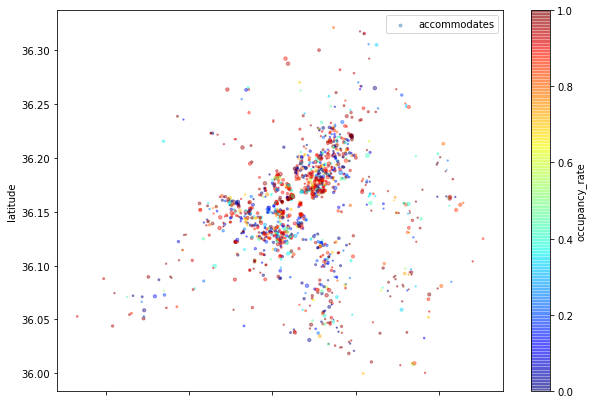

In [227]:
Afford_Nash = Nash_listings_df[(Nash_listings_df['price/accomm']<43.4)&
                               (Nash_listings_df['price/accomm']>24.75)]

Afford_Nash.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=Afford_Nash['accommodates'], label='accommodates', figsize=(10,7),
                    c='occupancy_rate', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

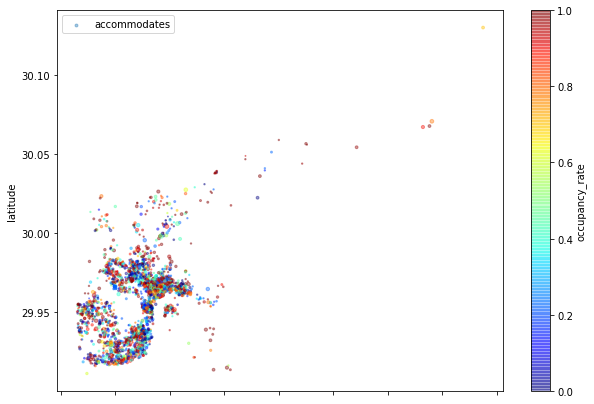

In [228]:
Afford_Orl = Orl_listings_df[(Orl_listings_df['price/accomm']<52.5)&
                               (Orl_listings_df['price/accomm']>25.0)]

Afford_Orl.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=Afford_Orl['accommodates'], label='accommodates', figsize=(10,7),
                    c='occupancy_rate', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

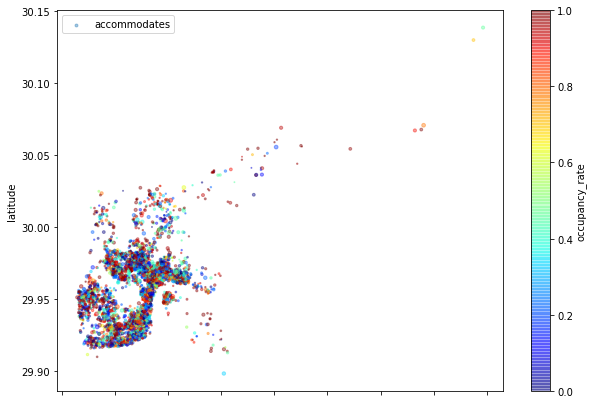

In [231]:
#Afford_Orl = Orl_listings_df[(Orl_listings_df['price/accomm']<52.5)&
                               #(Orl_listings_df['price/accomm']>25.0)]

Orl_listings_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=Orl_listings_df['accommodates'], label='accommodates', figsize=(10,7),
                    c='occupancy_rate', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

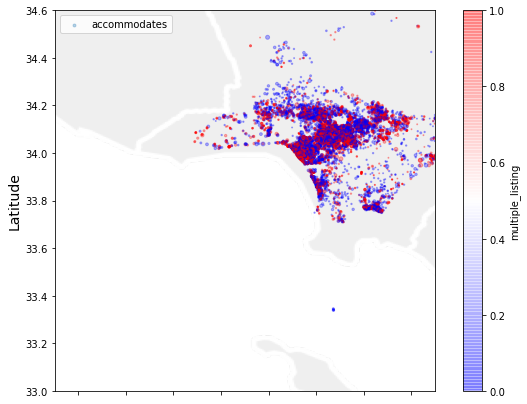

In [151]:
Afford_LA = LA_listings_df[(LA_listings_df['price/accomm']>27.95) &
                           (LA_listings_df['price/accomm']<56.25)]

import matplotlib.image as mpimg
california_img=mpimg.imread('PngItem_52569842.png')
ax = Afford_LA.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
                    s=Afford_LA['accommodates'], label='accommodates', figsize=(10,7),
                    c='multiple_listing', cmap=plt.get_cmap('bwr'), colorbar=True)
plt.imshow(california_img, extent=[-119.5, -117.9, 33.0, 34.6], alpha=0.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend()
plt.show()

In [23]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Blank_California_Map.svg/867px-Blank_California_Map.svg.png')
LA_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(LA,zorder=0,extent=[-119.0, -117.6, 34.6,34.8])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

UnsupportedOperation: seek

<Figure size 720x576 with 0 Axes>

In [24]:
pip install geopandas

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\jamie\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jamie\\AppData\\Local\\Temp\\pip-install-55qmpdmh\\fiona_6a509f78f3e74db08380072bf0ab26aa\\setup.py'"'"'; __file__='"'"'C:\\Users\\jamie\\AppData\\Local\\Temp\\pip-install-55qmpdmh\\fiona_6a509f78f3e74db08380072bf0ab26aa\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\jamie\AppData\Local\Temp\pip-pip-egg-info-ulqi_2gi'
         cwd: C:\Users\jamie\AppData\Local\Temp\pip-install-55qmpdmh\fiona_6a509f78f3e74db08380072bf0ab26aa\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment 


  Running setup.py clean for fiona
Failed to build fiona
    Running setup.py install for fiona: started
    Running setup.py install for fiona: finished with status 'error'



    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\jamie\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jamie\\AppData\\Local\\Temp\\pip-install-55qmpdmh\\fiona_6aca5773d4444dc9b76a4b502119a3bc\\setup.py'"'"'; __file__='"'"'C:\\Users\\jamie\\AppData\\Local\\Temp\\pip-install-55qmpdmh\\fiona_6aca5773d4444dc9b76a4b502119a3bc\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\jamie\AppData\Local\Temp\pip-pip-egg-info-us1qwp9y'
         c

In [25]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [82]:
#correlation between price/accomm and occupency
listings_df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,state,weekly_price,zipcode,No_properties_under_id,multiple_listing,price/accomm,2-5_listings,6-10_listings,11+_listings,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,NC,$650.00,28806.0,1,0.0,52.50,0.0,0.0,0.0,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,NC,NaN,28806.0,4,1.0,31.25,1.0,0.0,0.0,2-5 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NC,NaN,28806.0,1,0.0,45.00,0.0,0.0,0.0,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NC,NaN,28806.0,6,1.0,4.00,0.0,1.0,0.0,6-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NC,NaN,28806.0,6,1.0,4.00,0.0,1.0,0.0,6-10 listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,CA,NaN,90631,1,0.0,37.50,0.0,0.0,0.0,single
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,CA,NaN,90265,2,1.0,102.50,1.0,0.0,0.0,2-5 listings
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,CA,NaN,90265,1,0.0,50.00,0.0,0.0,0.0,single
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,CA,NaN,90631,1,0.0,16.25,0.0,0.0,0.0,single


<AxesSubplot:xlabel='price/accomm', ylabel='occupancy_rate'>

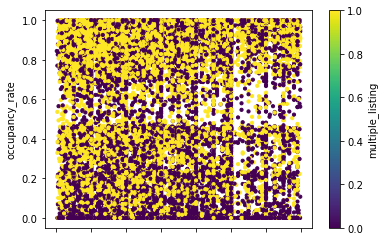

In [40]:
listings_df[(listings_df['price/accomm']<60)&
            (listings_df['price/accomm']>25)].plot.scatter(x = 'price/accomm', y = 'occupancy_rate', c = 'multiple_listing', colormap='viridis',s=10)

<AxesSubplot:xlabel='price/accomm', ylabel='occupancy_rate'>

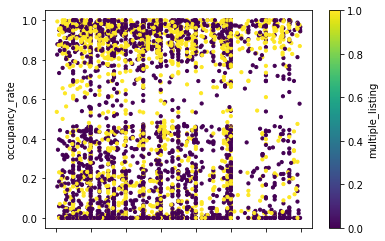

In [43]:
Aust_listings_df[(Aust_listings_df['price/accomm']<60)&
            (Aust_listings_df['price/accomm']>25)].plot.scatter(x = 'price/accomm', y = 'occupancy_rate', c = 'multiple_listing', colormap='viridis',s=10)

<AxesSubplot:xlabel='price/accomm', ylabel='occupancy_rate'>

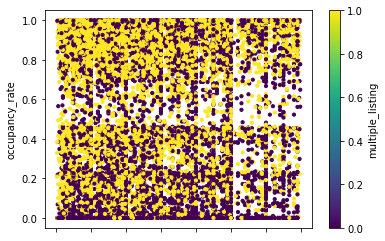

In [48]:
LA_listings_df[(LA_listings_df['price/accomm']<60)&
            (LA_listings_df['price/accomm']>25)].plot.scatter(x = 'price/accomm', y = 'occupancy_rate', c = 'multiple_listing', colormap='viridis',s=10)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['single' 'single' 'single' ... 'single' 'single' 'single']

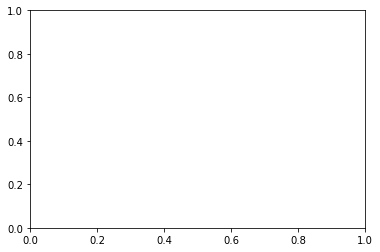

In [152]:
LA_listings_df[(LA_listings_df['price/accomm']<60)&
            (LA_listings_df['price/accomm']>25)].plot.scatter(x = 'price/accomm', y = 'occupancy_rate', c = 'Listing Type',s=10)

# Multiple listings intro

In [51]:
hosts_df = listings_df.groupby('host_id').count().sort_values('accommodates', ascending = False).iloc[:,:1]
hosts_df = hosts_df.rename(columns={'accommodates':'Num_properties'})
hosts_df.iloc[:10,:]

top_10_hosts = [4962900,31148752,4641823,6855810,114353388,1710302,8167447,21940642,41183272,15864252]
listings_top_hosts = listings_df.loc[listings_df['host_id'].isin(top_10_hosts),:]
listings_top_hosts = listings_top_hosts.groupby(['host_id', 'metropolitan']).size()

In [54]:
listings_top_hosts

host_id    metropolitan
1710302    austin          57
4641823    austin          73
           nashville        7
4962900    nashville       38
           new_orleans     83
6855810    nashville       59
8167447    austin          50
15864252   austin          45
21940642   LA              49
31148752   LA               4
           austin          45
           nashville       44
41183272   LA              19
           austin          17
           nashville       13
114353388  new_orleans     58
dtype: int64

Text(0, 0.5, 'Number of properties')

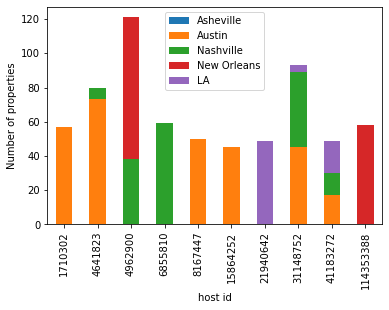

In [71]:
df = pd.DataFrame(np.array([[1710302,0,57,0,0,0],[4641823,0,73,7,0,0],[4962900,0,0,38,83,0],[6855810,0,0,59,0,0],[8167447,0,50,0,0,0],[15864252,0,45,0,0,0],[21940642,0,0,0,0,49],[31148752,0,45,44,0,4],[41183272,0,17,13,0,19],[114353388,0,0,0,58,0]]),
                 columns=['host id', 'Asheville', 'Austin', 'Nashville', 'New Orleans', 'LA'])
ax = df.plot.bar(x = 'host id',stacked=True)
ax.set_ylabel('Number of properties')

Text(0.5, 1.0, 'Density and distribution of prices/accom for each metropolitan')

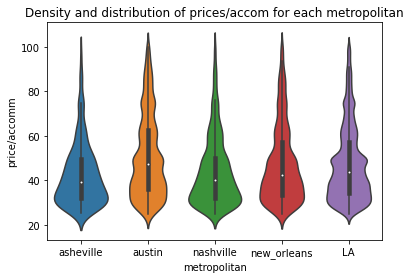

In [101]:
#plot violins
mid_listings_df = listings_df[(listings_df['price/accomm']<100)&
                              (listings_df['price/accomm']>25)]
viz_1 = sns.violinplot(data=mid_listings_df, x = 'metropolitan', y='price/accomm')
viz_1.set_title('Density and distribution of prices/accom for each metropolitan')

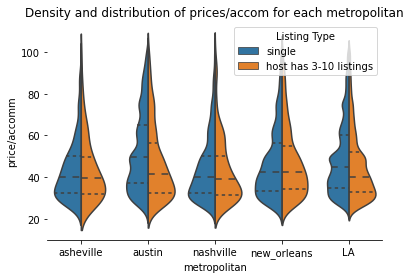

In [141]:
#plot violins
mid_listings_df = listings_df[(listings_df['price/accomm']<100)&
                              (listings_df['price/accomm']>25)]
mid_listings_df = mid_listings_df[mid_listings_df['Listing Type'].notna()]
viz_1 = sns.violinplot(data=mid_listings_df, x = 'metropolitan', y='price/accomm', hue = 'Listing Type', split = True, inner = 'quart')
viz_1.set_title('Density and distribution of prices/accom for each metropolitan')
sns.despine(left=True)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.show(viz_1)

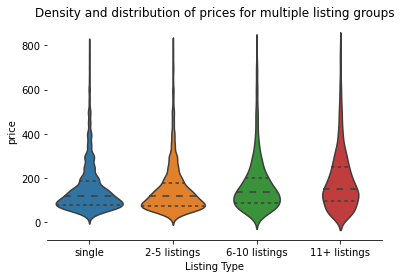

In [80]:
mid_listings_df = listings_df[(listings_df['price/accomm']<80)&
                              (listings_df['price/accomm']>25)&
                             (listings_df['price']<800)]
#mid_listings_df = mid_listings_df[mid_listings_df['Listing Type'].notna()]
viz_1 = sns.violinplot(data=mid_listings_df, x = 'Listing Type',y='price', split = True, inner = 'quart')
viz_1.set_title('Density and distribution of prices for multiple listing groups')
sns.despine(left=True)
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.show(viz_1)

In [123]:
mid_listings_df['Listing Type'].unique()

array(['single', 'NaN', 'host has 6 or more listings'], dtype=object)

In [153]:
from scipy import stats
import random

In [150]:
#Test that price/accomm for multiple listings is different for Austin & LA

#Listings in the middle 50% of price/accomm Aust: 
Aust_sing = Aust_listings_df[(Aust_listings_df['price/accomm']<75)&
                 (Aust_listings_df['price/accomm']>28.5)&(Aust_listings_df['Listing Type']=='single')]['price/accomm']
Aust_310 = Aust_listings_df[(Aust_listings_df['price/accomm']<75)&
                 (Aust_listings_df['price/accomm']>28.5)&(Aust_listings_df['Listing Type']!='single')]['price/accomm']
stats.ttest_ind(Aust_sing, Aust_310, equal_var=False)

Ttest_indResult(statistic=4.184601622048541, pvalue=2.9284494679897434e-05)

In [157]:
#Listings in the middle 50% of price/accomm LA: 
LA_sing = LA_listings_df[(LA_listings_df['price/accomm']<56.25)&
                 (LA_listings_df['price/accomm']>27.95)&(LA_listings_df['Listing Type']=='single')]['price/accomm']
LA_310 = LA_listings_df[(LA_listings_df['price/accomm']<56.25)&
                 (LA_listings_df['price/accomm']>27.95)&(LA_listings_df['Listing Type']!='single')]['price/accomm']
stats.ttest_ind(LA_sing, LA_310, equal_var=False)

Ttest_indResult(statistic=9.083186376777702, pvalue=1.1824816958138124e-19)

In [164]:
#BOOTSTRAPPING for confindence interval
from numpy.random import default_rng
rng = default_rng()
numbers = rng.choice(20, size=10, replace=False)
numbers

def GetRanInd(observations, smaller_length):
    rng = default_rng()
    return rng.choice(observations, size=smaller_length, replace=False)

In [172]:
def RandomSelection(df,smaller_length):
    return df.iloc[GetRanInd(len(df), smaller_length),:]

In [189]:
listings_df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,No_properties_under_id,multiple_listing,sing/monopoly_listing,price/accomm,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,10.0,Entire home/apt,NC,$650.00,28806.0,1,0.0,0.0,52.50,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,9.0,Entire home/apt,NC,NaN,28806.0,4,1.0,NaN,31.25,host has 3-10 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NaN,Private room,NC,NaN,28806.0,1,0.0,0.0,45.00,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,Shared room,NC,NaN,28806.0,6,1.0,1.0,4.00,host has 3-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,10.0,Shared room,NC,NaN,28806.0,6,1.0,1.0,4.00,host has 3-10 listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,NaN,Private room,CA,NaN,90631,1,0.0,0.0,37.50,single
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,NaN,Private room,CA,NaN,90265,2,1.0,NaN,102.50,NaN
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,NaN,Entire home/apt,CA,NaN,90265,1,0.0,0.0,50.00,single
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,NaN,Private room,CA,NaN,90631,1,0.0,0.0,16.25,single


Make gif of Los Angeles for different listings depending on category


In [23]:
df = listings_df
df.loc[(df['No_properties_under_id']>1)&(df['No_properties_under_id']<6), '2-5_listings'] = 1
df.loc[(df['No_properties_under_id']==1)|(df['No_properties_under_id']>5), '2-5_listings'] = 0
df.loc[(df['No_properties_under_id']>5)&(df['No_properties_under_id']<11), '6-10_listings'] = 1
df.loc[(df['No_properties_under_id']<6)|(df['No_properties_under_id']>10), '6-10_listings'] = 0
df.loc[df['No_properties_under_id']>10, '11+_listings'] = 1
df.loc[df['No_properties_under_id']<11, '11+_listings'] = 0
listings_df = df

In [193]:
df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,weekly_price,zipcode,No_properties_under_id,multiple_listing,sing/monopoly_listing,price/accomm,Listing Type,2-5_listings,6-10_listings,11+_listings
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,$650.00,28806.0,1,0.0,0.0,52.50,single,0.0,0.0,0.0
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,NaN,28806.0,4,1.0,NaN,31.25,host has 3-10 listings,1.0,0.0,0.0
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NaN,28806.0,1,0.0,0.0,45.00,single,0.0,0.0,0.0
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,28806.0,6,1.0,1.0,4.00,host has 3-10 listings,0.0,1.0,0.0
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,28806.0,6,1.0,1.0,4.00,host has 3-10 listings,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,NaN,90631,1,0.0,0.0,37.50,single,0.0,0.0,0.0
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,NaN,90265,2,1.0,NaN,102.50,NaN,1.0,0.0,0.0
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,NaN,90265,1,0.0,0.0,50.00,single,0.0,0.0,0.0
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,NaN,90631,1,0.0,0.0,16.25,single,0.0,0.0,0.0


(-118.95, -117.6)

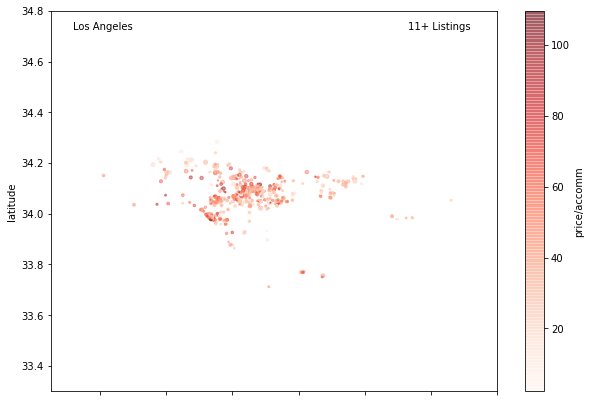

In [58]:
#make los angeles heat maps for price/accomm for different multiple listing types
# Afford_LA = LA_listings_df[(LA_listings_df['price/accomm']>27.95) &
#                            (LA_listings_df['price/accomm']<56.25)]

#make a heat map of prices for Austin

#get rid of outliers over 75th percentile
LA_plot = LA_listings_df[(LA_listings_df['price/accomm']<110)&(LA_listings_df['11+_listings']==1)]

LA_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=LA_plot['accommodates'], label='accommodates', figsize=(10,7),
                    c='price/accomm', cmap=plt.get_cmap('Reds'), colorbar=True, legend = False)
plt.annotate("11+ Listings", xy=(0.8,0.95),xycoords='axes fraction',
             fontsize=10)
plt.annotate("Los Angeles", xy=(0.05,0.95),xycoords='axes fraction',
             fontsize=10)
plt.ylim(33.3, 34.8)
plt.xlim(-118.95,-117.6)

No handles with labels found to put in legend.


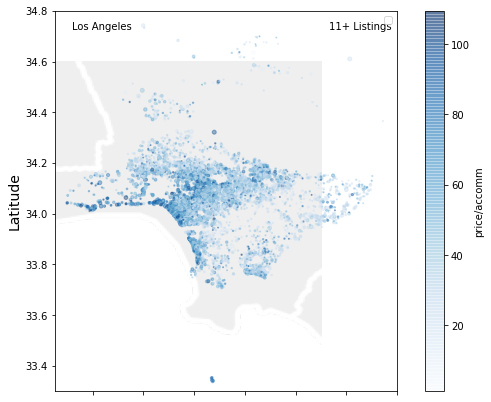

In [163]:
import matplotlib.image as mpimg
california_img=mpimg.imread('PngItem_52569842.png')

LA_plot = LA_listings_df[(LA_listings_df['price/accomm']<110)&(LA_listings_df['Listing Type']=='single')]

ax = LA_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=LA_plot['accommodates'], label='accommodates', figsize=(10,7),
                    c='price/accomm', cmap=plt.get_cmap('Blues'), colorbar=True, legend = False)
plt.annotate("11+ Listings", xy=(0.8,0.95),xycoords='axes fraction',
             fontsize=10)
plt.annotate("Los Angeles", xy=(0.05,0.95),xycoords='axes fraction',
             fontsize=10)
plt.ylim(33.3, 34.8)
plt.xlim(-118.95,-117.6)



plt.imshow(california_img, extent=[-119.5, -117.9, 33.0, 34.6], alpha=0.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend()
plt.show()

In [41]:
LA_listings_df['longitude'].max()

-117.6554707816984

In [158]:
listings_df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_value,room_type,state,weekly_price,zipcode,occupancy_rate,price/accomm,No_properties_under_id,multiple_listing,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,10.0,Entire home/apt,NC,$650.00,28806.0,0.848635,52.50,1,0.0,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,9.0,Entire home/apt,NC,NaN,28806.0,0.627516,31.25,4,1.0,2-5 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NaN,Private room,NC,NaN,28806.0,0.991453,45.00,1,0.0,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NaN,Shared room,NC,NaN,28806.0,0.977943,4.00,6,1.0,6-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,10.0,Shared room,NC,NaN,28806.0,0.957844,4.00,6,1.0,6-10 listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,NaN,Private room,CA,NaN,90631,0.997347,37.50,1,0.0,single
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,NaN,Private room,CA,NaN,90265,0.453923,102.50,2,1.0,2-5 listings
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,NaN,Entire home/apt,CA,NaN,90265,0.997347,50.00,1,0.0,single
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,NaN,Private room,CA,NaN,90631,0.431017,16.25,1,0.0,single


In [81]:
listings_df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,state,weekly_price,zipcode,No_properties_under_id,multiple_listing,price/accomm,2-5_listings,6-10_listings,11+_listings,Listing Type
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,...,NC,$650.00,28806.0,1,0.0,52.50,0.0,0.0,0.0,single
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,...,NC,NaN,28806.0,4,1.0,31.25,1.0,0.0,0.0,2-5 listings
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,...,NC,NaN,28806.0,1,0.0,45.00,0.0,0.0,0.0,single
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NC,NaN,28806.0,6,1.0,4.00,0.0,1.0,0.0,6-10 listings
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,...,NC,NaN,28806.0,6,1.0,4.00,0.0,1.0,0.0,6-10 listings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,NaN,...,CA,NaN,90631,1,0.0,37.50,0.0,0.0,0.0,single
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,NaN,...,CA,NaN,90265,2,1.0,102.50,1.0,0.0,0.0,2-5 listings
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,NaN,...,CA,NaN,90265,1,0.0,50.00,0.0,0.0,0.0,single
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,NaN,...,CA,NaN,90631,1,0.0,16.25,0.0,0.0,0.0,single
